In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer


train = pd.read_csv('train.csv',index_col='Train_ID')
test = pd.read_csv('test.csv', index_col='Test_ID')
test.shape

(1210, 79)

Data Processing and Exploratory Data Analysis

In [777]:
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')

Lot Frontage 0.1682  % missing values
Alley 0.9376  % missing values
Mas Vnr Type 0.0096  % missing values
Mas Vnr Area 0.0096  % missing values
Bsmt Qual 0.0268  % missing values
Bsmt Cond 0.0268  % missing values
Bsmt Exposure 0.028  % missing values
BsmtFin Type 1 0.0268  % missing values
BsmtFin Type 2 0.0268  % missing values
Fireplace Qu 0.4771  % missing values
Garage Type 0.0522  % missing values
Garage Yr Blt 0.0529  % missing values
Garage Finish 0.0529  % missing values
Garage Qual 0.0529  % missing values
Garage Cond 0.0529  % missing values
Pool QC 0.9949  % missing values
Fence 0.807  % missing values
Misc Feature 0.9643  % missing values


Relationship between missing values and Salesprice

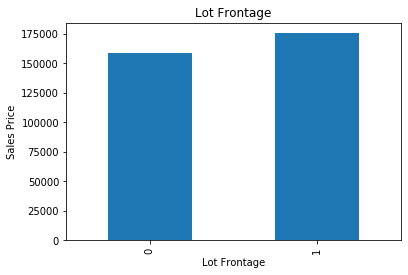

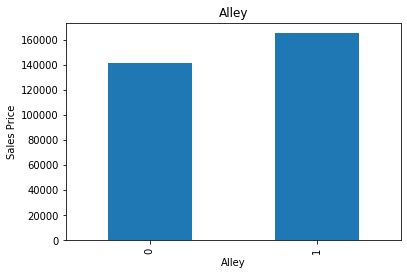

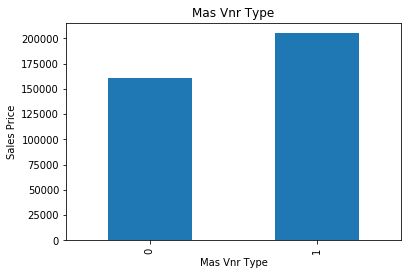

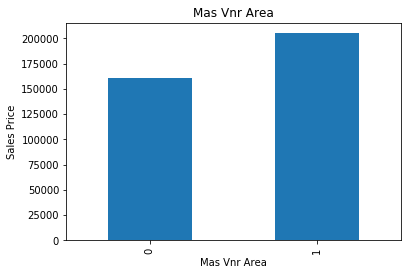

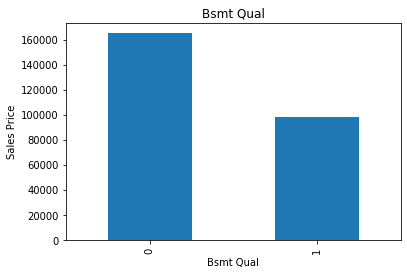

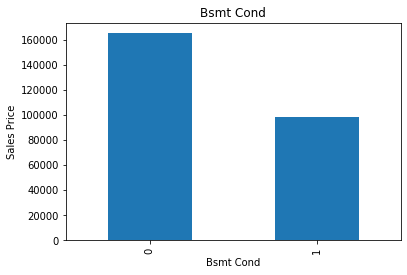

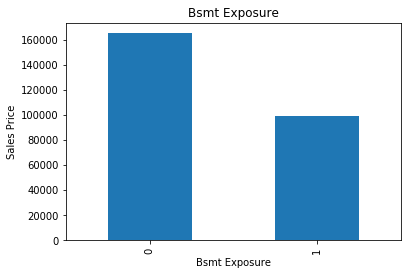

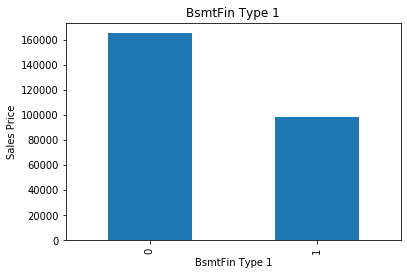

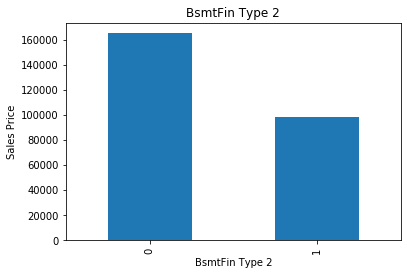

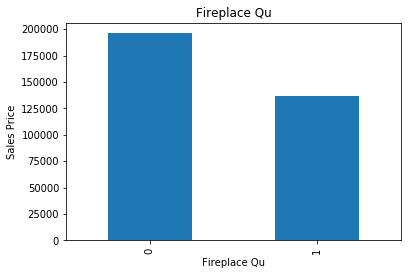

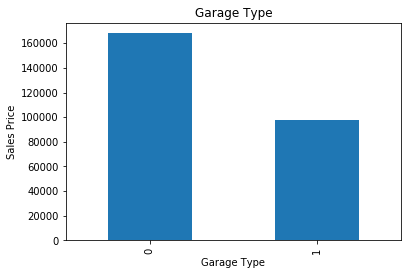

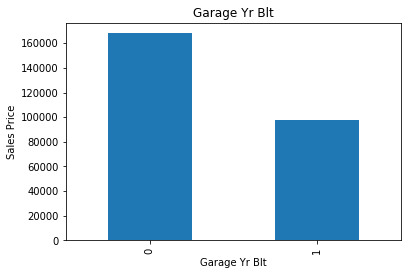

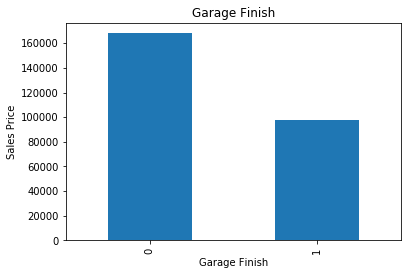

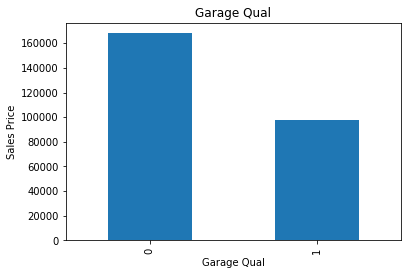

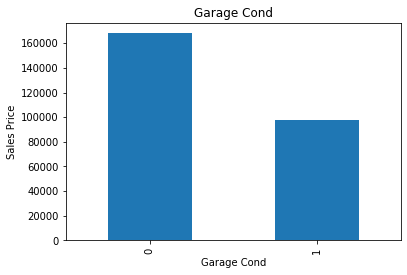

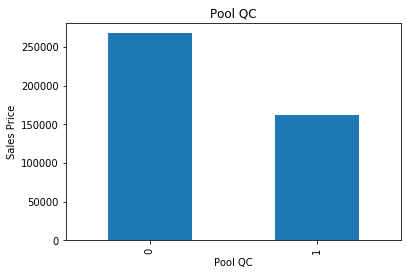

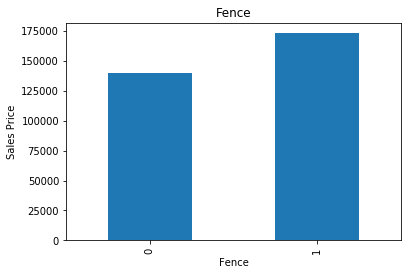

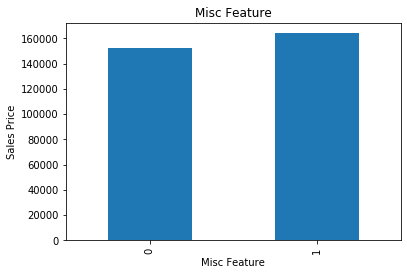

In [672]:
for feature in features_with_na:
    data = train.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('Sales Price')
    plt.show()

In [154]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  74


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,SalePrice
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,-1.367326,-10.486938,-16.760884,-4.366771,-6.371121,-1.215565,-1.139558,-0.580554,-0.990231,-0.294734,...,3,3,4,3,3,1,1,2,2,209000
2,-1.332517,-16.486414,-19.329807,-3.357839,-5.538703,-1.231061,-1.172791,-0.582337,-0.988683,-0.294734,...,3,2,4,2,3,2,1,2,2,254000
3,-1.373128,-7.417053,-15.374431,-4.366771,-4.706286,-1.166866,-1.037485,-0.577114,-0.991458,-0.294734,...,3,1,4,2,3,0,1,2,2,172500
4,-1.390532,-12.336633,-18.050393,-3.862305,-5.538703,-1.233274,-1.177539,-0.580681,-0.992937,-0.294734,...,3,2,4,2,3,1,1,2,2,232000
5,-1.355723,-10.486938,-15.859704,-4.366771,-5.538703,-1.180148,-1.063597,-0.586222,-0.990039,-0.294734,...,3,1,4,3,3,1,1,2,2,148000


In [155]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature
#Here we want to look at the number of Year variables to see its relationship between salesprice.

['Year Built', 'Year Remod/Add']

Text(0.5, 1.0, 'House Price vs YearSold')

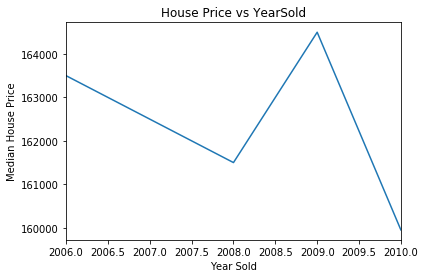

In [158]:
train.groupby('Yr Sold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [169]:
import collections, numpy
f = np.array(train.loc[:,'Yr Sold'])
collections.Counter(f)

Counter({2006: 350, 2009: 339, 2010: 186, 2008: 340, 2007: 355})

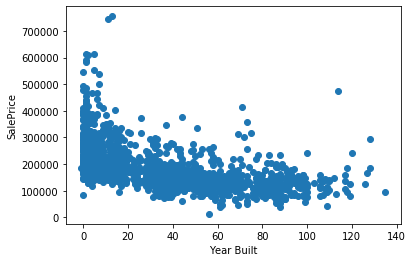

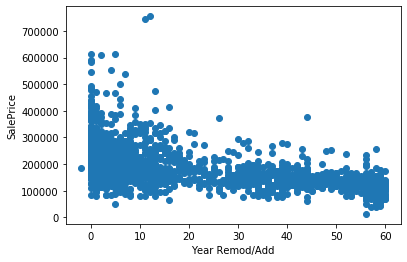

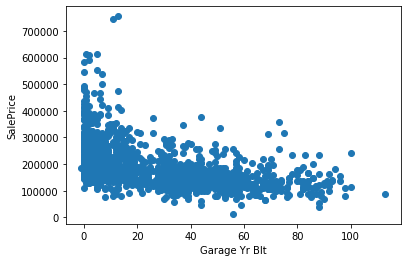

In [10]:
#We plot the difference between the Year sold and other features and the Salesprice.
for feature in year_feature:
    if feature!='Yr Sold':
        data=train.copy()
        data[feature]=data['Yr Sold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [11]:
## We can see that generally newer houses have higher sales price.

In [12]:
#Discrete Variables and relationship between Sales price

In [13]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [14]:
train[discrete_feature].head()


,MS SubClass,Overall Qual,Overall Cond,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,3Ssn Porch,Pool Area,Misc Val,Mo Sold
Train_ID,,,,,,,,,,,,,,,,,
1,60,6,4,0,0.0,0.0,2,1,4,1,9,1,2,0,0,0,11
2,120,8,5,0,1.0,0.0,2,0,2,1,6,1,2,0,0,0,12
3,50,6,6,0,0.0,0.0,2,0,3,1,6,1,2,0,0,0,1
4,20,7,5,0,0.0,0.0,2,0,3,1,7,0,3,0,0,0,4
5,80,6,5,0,0.0,1.0,1,0,3,1,6,1,2,0,0,0,3


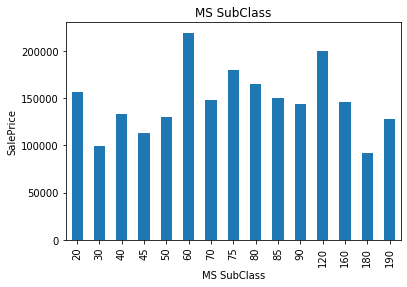

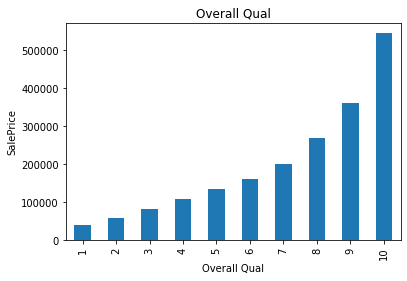

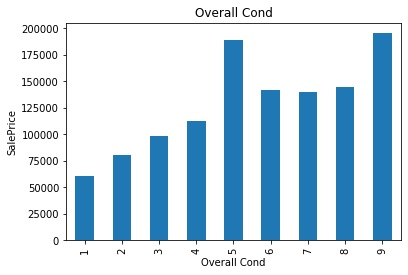

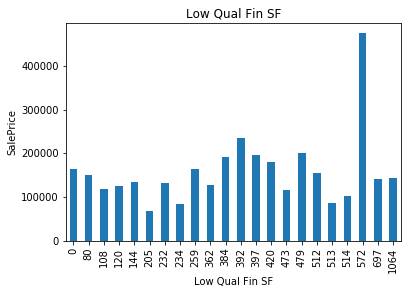

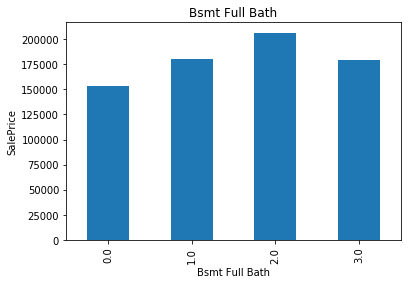

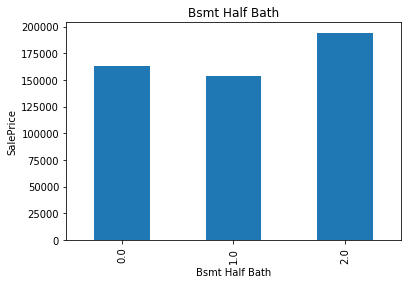

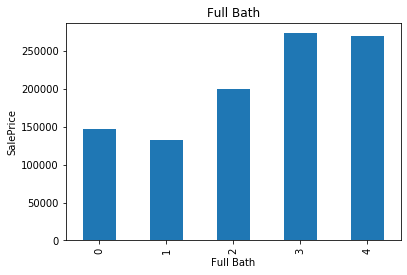

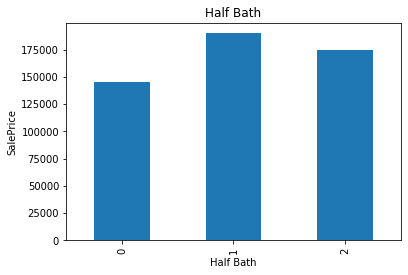

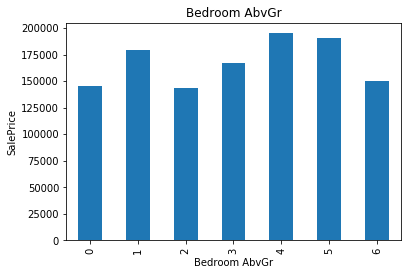

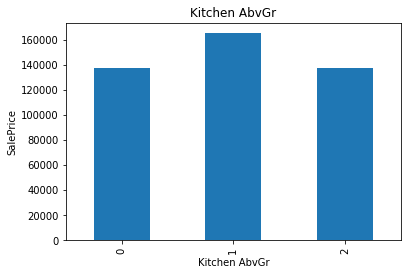

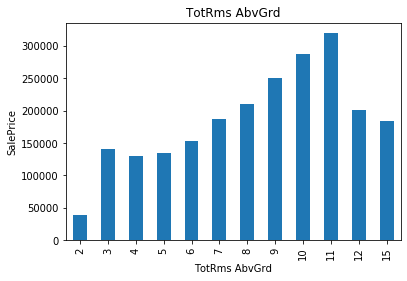

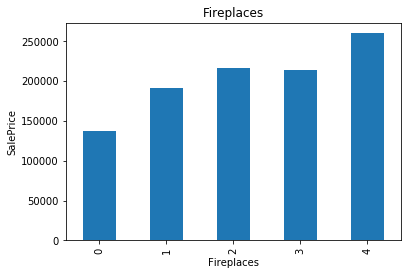

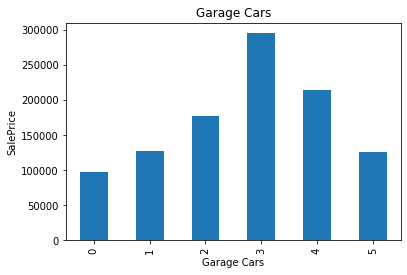

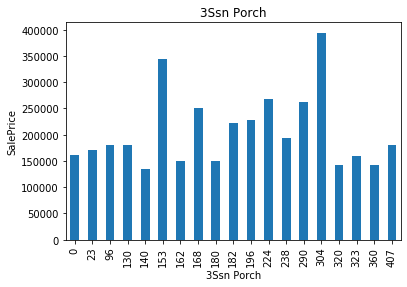

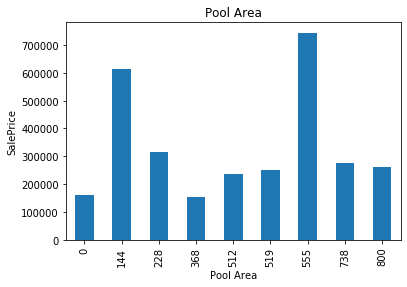

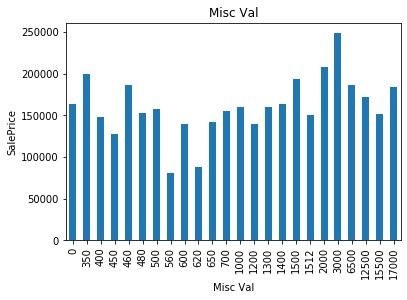

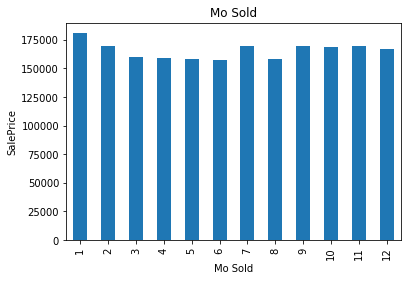

In [681]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [15]:
#Continuos variables

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


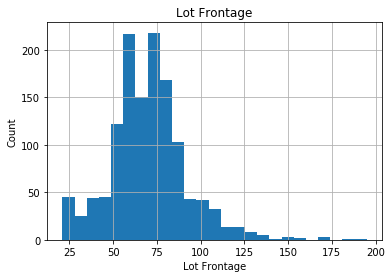

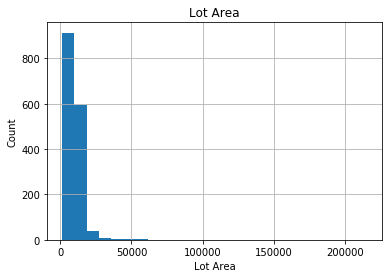

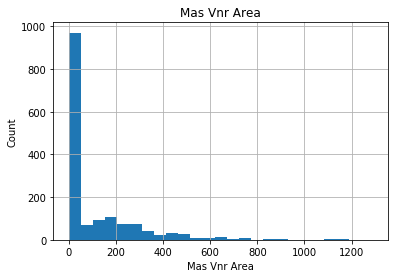

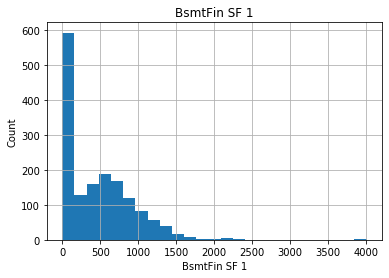

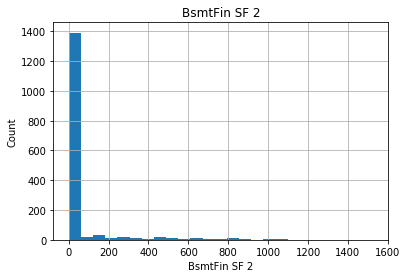

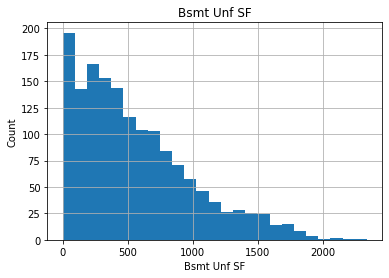

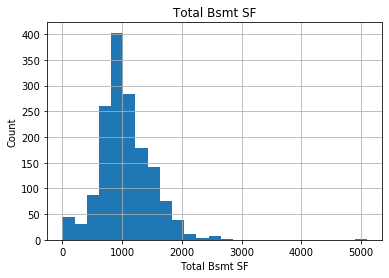

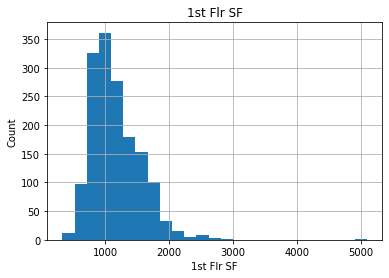

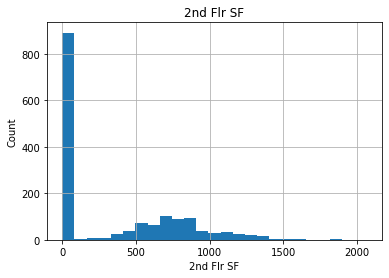

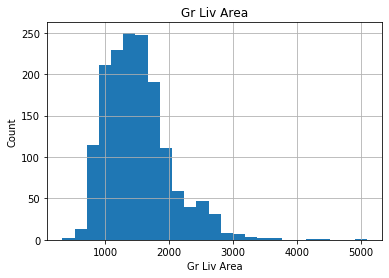

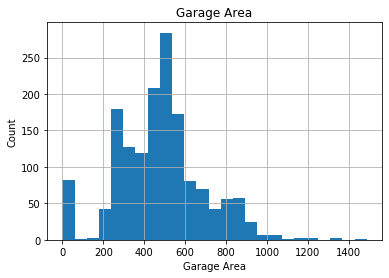

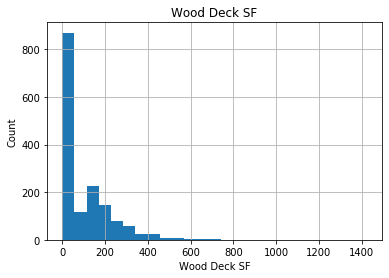

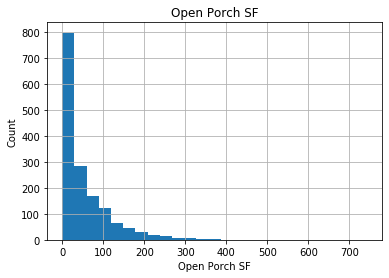

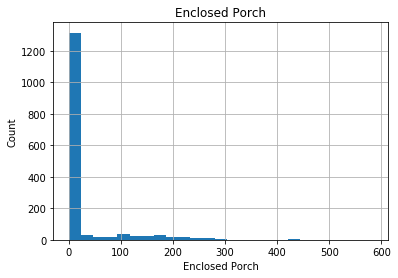

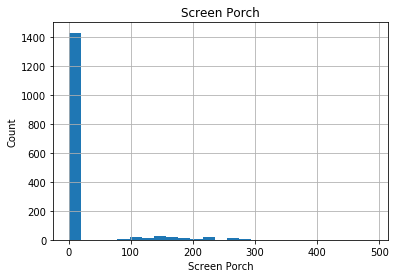

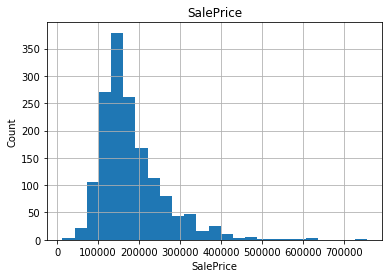

In [684]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

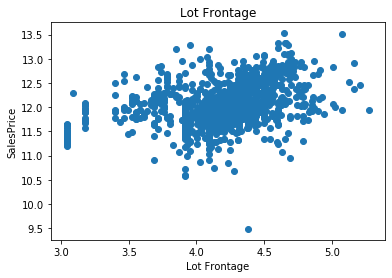

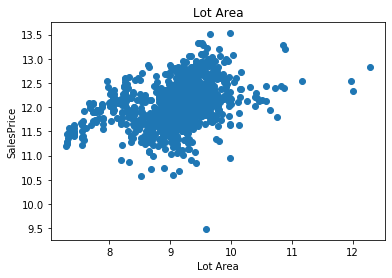

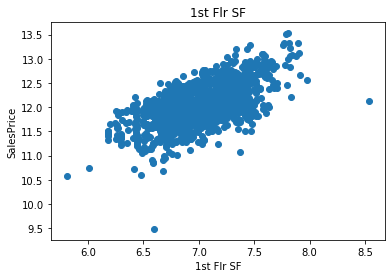

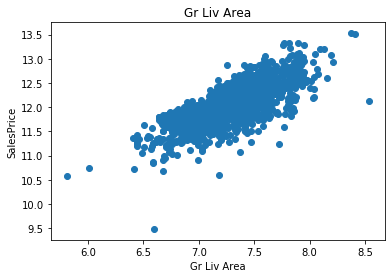

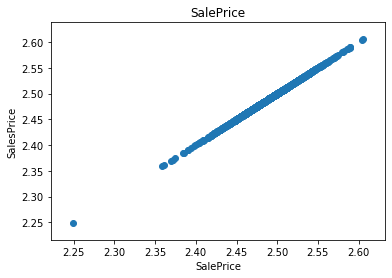

In [17]:
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

Outliers

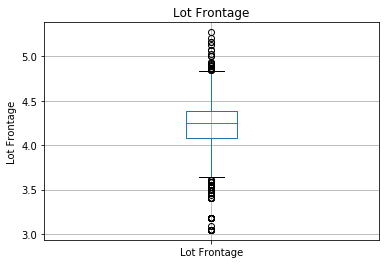

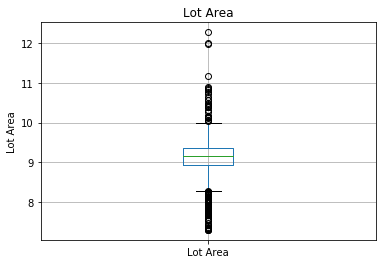

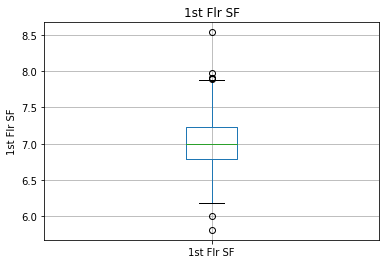

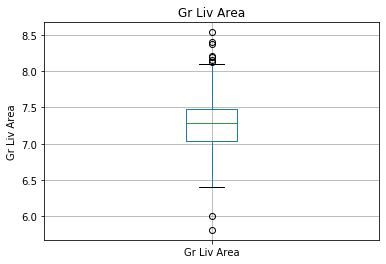

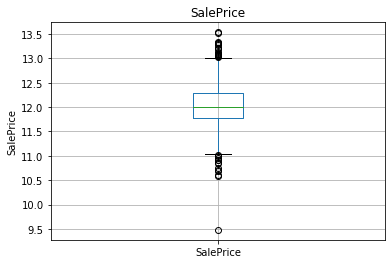

In [18]:
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [19]:
categorical_features=[feature for feature in train.columns if data[feature].dtypes=='O']
categorical_features

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

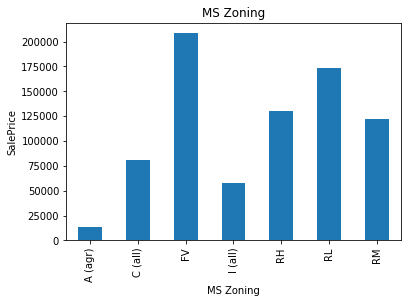

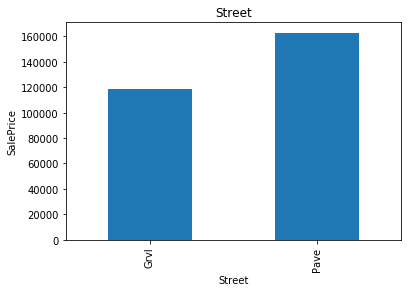

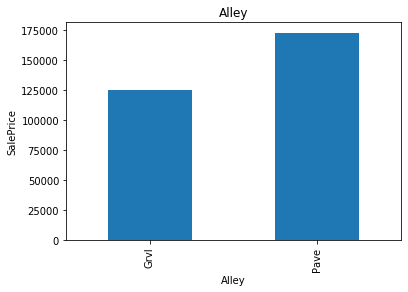

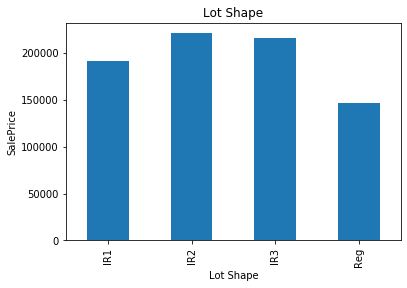

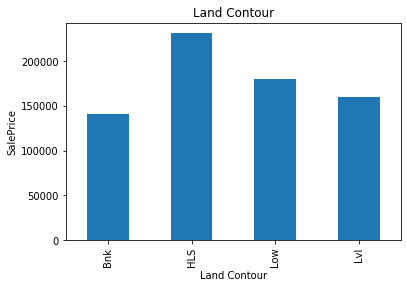

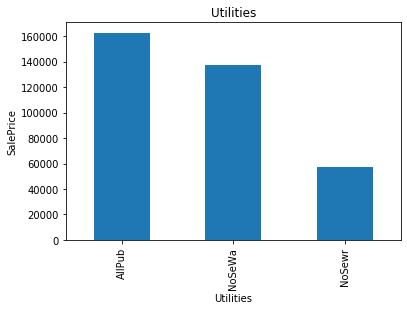

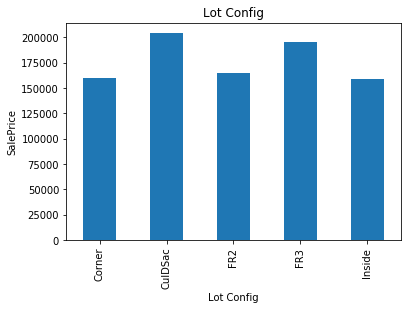

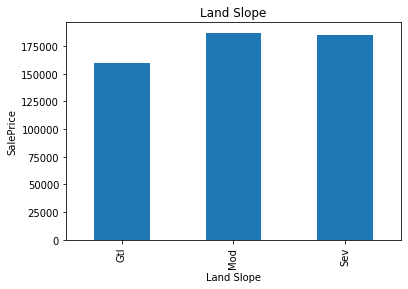

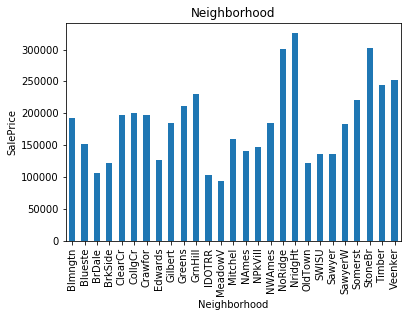

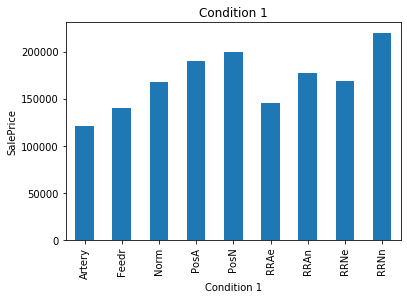

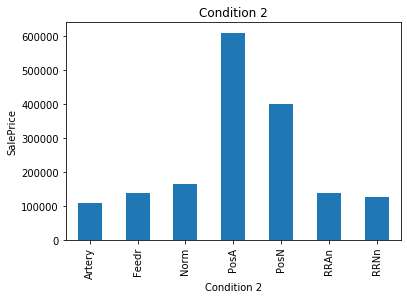

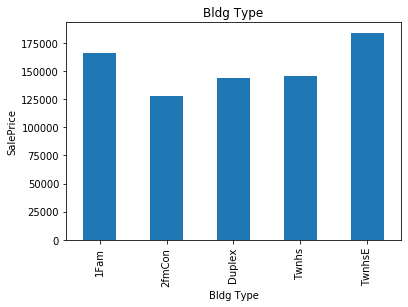

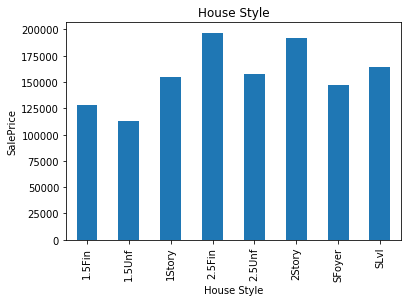

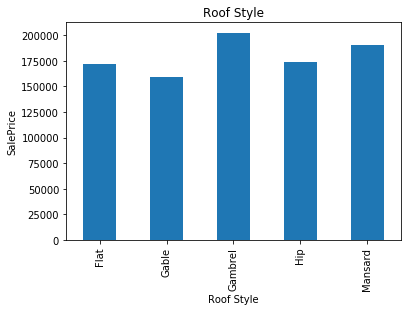

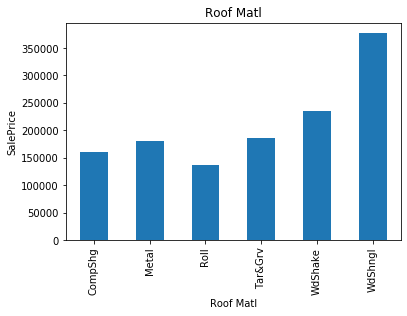

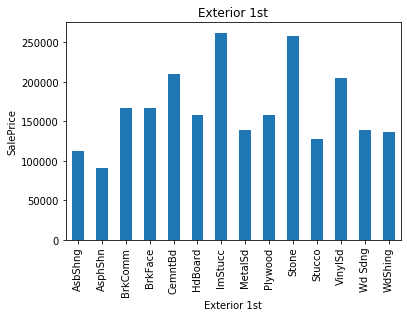

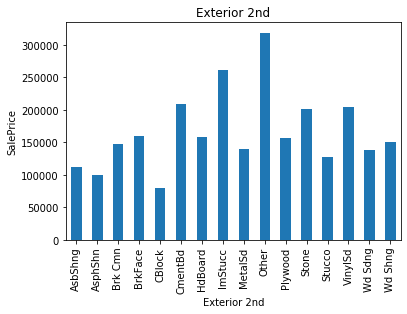

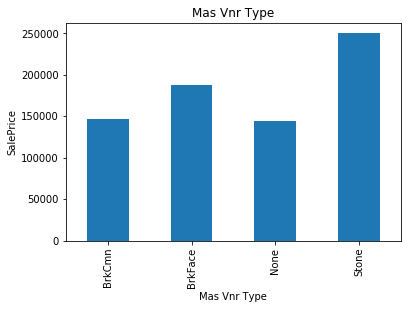

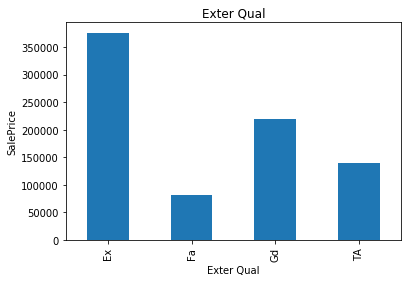

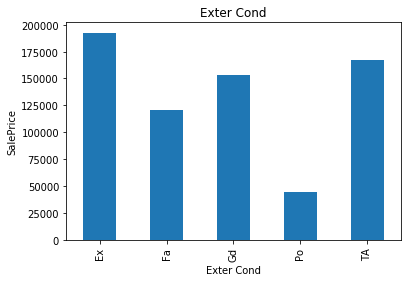

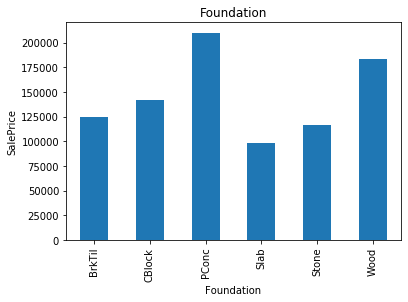

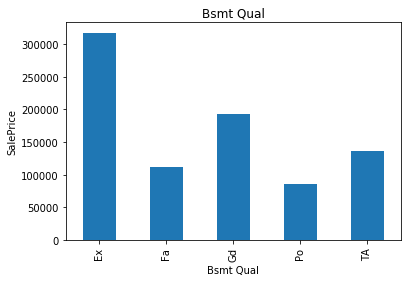

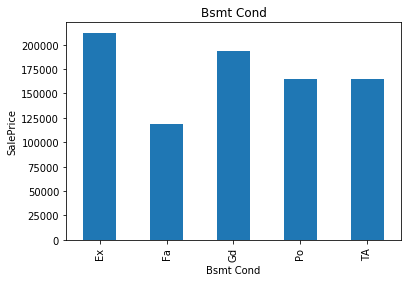

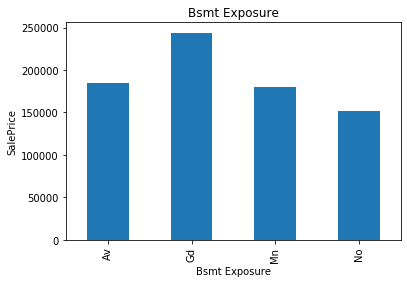

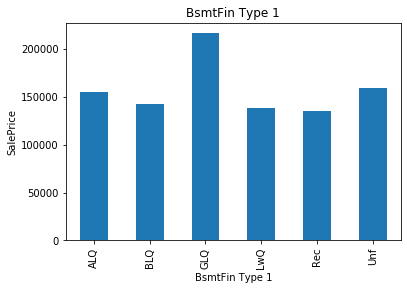

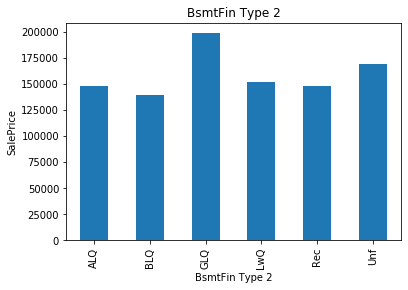

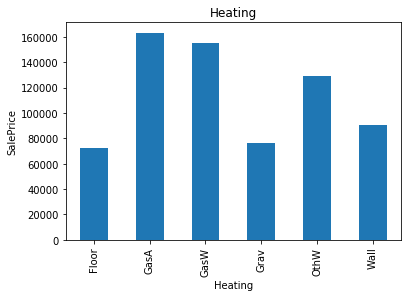

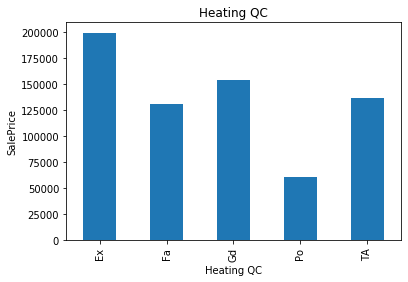

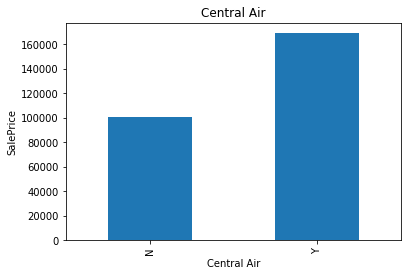

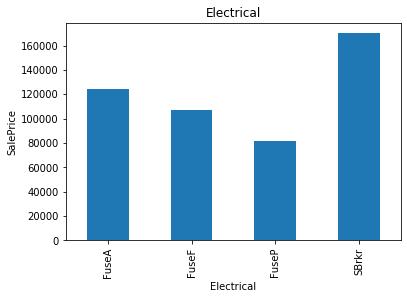

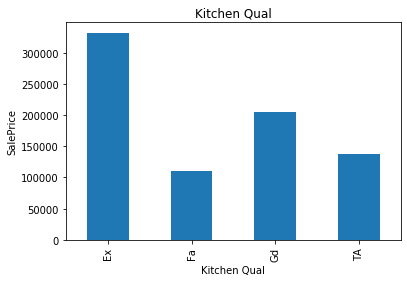

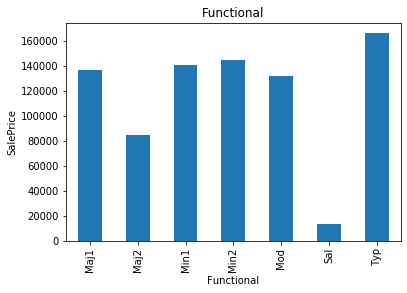

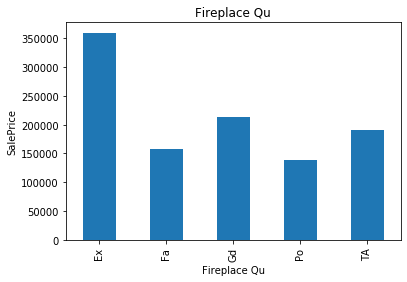

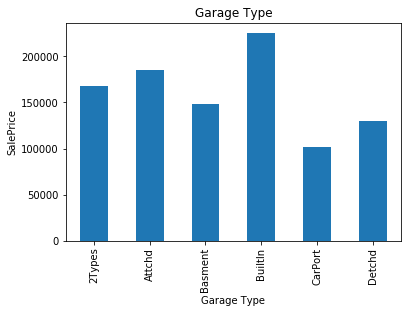

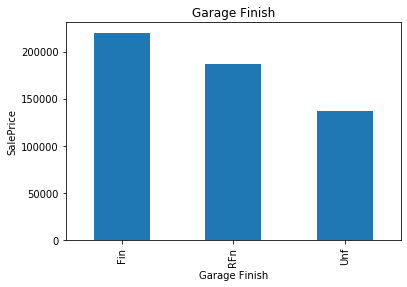

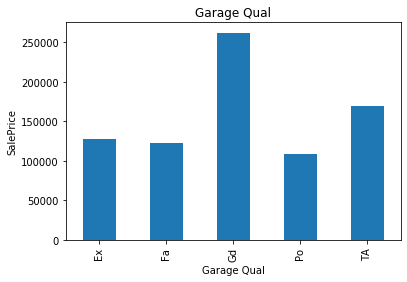

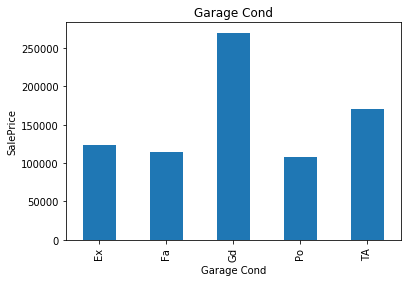

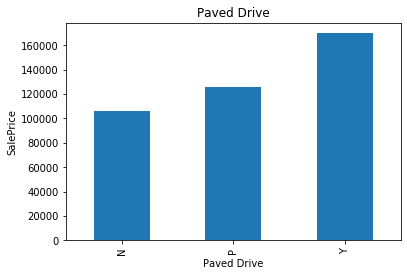

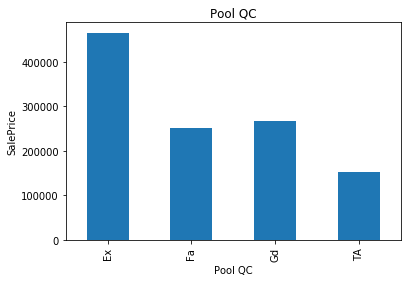

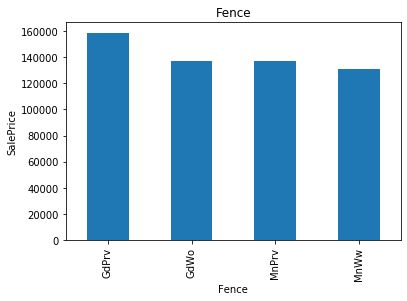

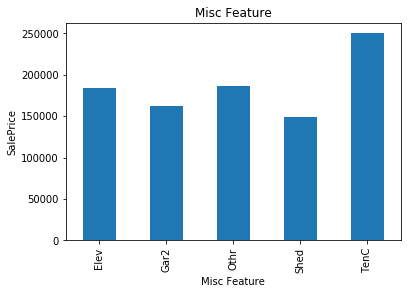

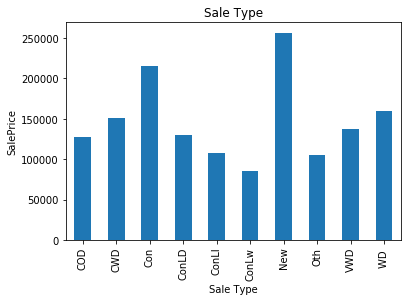

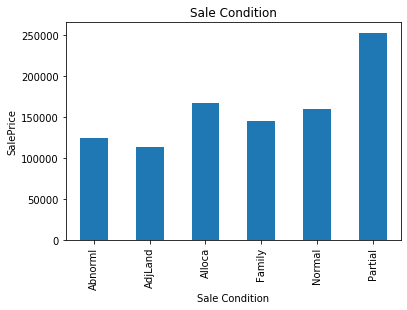

In [20]:
for feature in categorical_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [21]:
#pd.set_option('display.max_rows', 100)
train.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      264
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

Feature Engineering

In [22]:
#Drop the four features
#Drop GarageYrBlt because we believe its not a good predictor

train.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Garage Yr Blt'],axis=1,inplace=True)
test.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Garage Yr Blt'],axis=1,inplace=True)

In [23]:
## Fill Missing Values
train['Lot Frontage']=train['Lot Frontage'].fillna(train['Lot Frontage'].mean())
test['Lot Frontage']=test['Lot Frontage'].fillna(test['Lot Frontage'].mean())


In [24]:
train['Bsmt Cond']=train['Bsmt Cond'].fillna(train['Bsmt Cond'].mode()[0])
train['Bsmt Qual']=train['Bsmt Qual'].fillna(train['Bsmt Qual'].mode()[0])

test['Bsmt Qual']=test['Bsmt Qual'].fillna(test['Bsmt Qual'].mode()[0])
test['Bsmt Cond']=test['Bsmt Cond'].fillna(test['Bsmt Cond'].mode()[0])

In [25]:
train['Fireplace Qu']=train['Fireplace Qu'].fillna(train['Fireplace Qu'].mode()[0])
train['Garage Type']=train['Garage Type'].fillna(train['Garage Type'].mode()[0])

test['Fireplace Qu']=test['Fireplace Qu'].fillna(test['Fireplace Qu'].mode()[0])
test['Garage Type']=test['Garage Type'].fillna(test['Garage Type'].mode()[0])

In [26]:
train['Garage Finish']=train['Garage Finish'].fillna(train['Garage Finish'].mode()[0])
train['Garage Qual']=train['Garage Qual'].fillna(train['Garage Qual'].mode()[0])
train['Garage Cond']=train['Garage Cond'].fillna(train['Garage Cond'].mode()[0])

test['Garage Finish']=test['Garage Finish'].fillna(test['Garage Finish'].mode()[0])
test['Garage Qual']=test['Garage Qual'].fillna(test['Garage Qual'].mode()[0])
test['Garage Cond']=test['Garage Cond'].fillna(test['Garage Cond'].mode()[0])

In [27]:
#Dealing with date time variables: Yr Sold, Yr Built and Yr Remod/Add
for feature in ['Year Built','Year Remod/Add']:  
    
    train[feature]=train['Yr Sold']-train[feature]

In [28]:
train[['Year Built','Year Remod/Add']].head()

,Year Built,Year Remod/Add
Train_ID,,
1,17,17
2,3,3
3,61,60
4,1,1
5,49,49


In [29]:
for feature in ['Year Built','Year Remod/Add']:  
    
    test[feature]=test['Yr Sold']-test[feature]

In [30]:
train.drop(['Yr Sold'],axis=1,inplace=True)
test.drop(['Yr Sold'],axis=1,inplace=True)

In [31]:
train.shape

(1570, 74)

In [32]:
test.shape

(1210, 73)

In [33]:
train.isnull().sum()


MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Misc Val          0
Mo Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 74, dtype: int64

In [34]:
train['Mas Vnr Type']=train['Mas Vnr Type'].fillna(train['Mas Vnr Type'].mode()[0])
train['Mas Vnr Area']=train['Mas Vnr Area'].fillna(train['Mas Vnr Area'].mode()[0])

test['Mas Vnr Type']=test['Mas Vnr Type'].fillna(test['Mas Vnr Type'].mode()[0])
test['Mas Vnr Area']=test['Mas Vnr Area'].fillna(test['Mas Vnr Area'].mode()[0])

In [35]:
train['Bsmt Exposure']=train['Bsmt Exposure'].fillna(train['Bsmt Exposure'].mode()[0])
train['BsmtFin Type 1']=train['BsmtFin Type 1'].fillna(train['BsmtFin Type 1'].mode()[0])
train['BsmtFin SF 1']=train['BsmtFin SF 1'].fillna(train['BsmtFin SF 1'].mode()[0])
train['BsmtFin Type 2']=train['BsmtFin Type 2'].fillna(train['BsmtFin Type 2'].mode()[0])
train['BsmtFin SF 2']=train['BsmtFin SF 2'].fillna(train['BsmtFin SF 2'].mode()[0])
train['Bsmt Unf SF']=train['Bsmt Unf SF'].fillna(train['Bsmt Unf SF'].mode()[0])
train['Total Bsmt SF']=train['Total Bsmt SF'].fillna(train['Total Bsmt SF'].mode()[0])
train['Bsmt Full Bath']=train['Bsmt Full Bath'].fillna(train['Bsmt Full Bath'].mode()[0])
train['Bsmt Half Bath']=train['Bsmt Half Bath'].fillna(train['Bsmt Half Bath'].mode()[0])



test['Bsmt Exposure']=test['Bsmt Exposure'].fillna(test['Bsmt Exposure'].mode()[0])
test['BsmtFin Type 1']=test['BsmtFin Type 1'].fillna(test['BsmtFin Type 1'].mode()[0])
test['BsmtFin SF 1']=test['BsmtFin SF 1'].fillna(test['BsmtFin SF 1'].mode()[0])
test['BsmtFin Type 2']=test['BsmtFin Type 2'].fillna(test['BsmtFin Type 2'].mode()[0])
test['BsmtFin SF 2']=test['BsmtFin SF 2'].fillna(test['BsmtFin SF 2'].mode()[0])
test['Bsmt Unf SF']=test['Bsmt Unf SF'].fillna(test['Bsmt Unf SF'].mode()[0])
test['Total Bsmt SF']=test['Total Bsmt SF'].fillna(test['Total Bsmt SF'].mode()[0])
test['Bsmt Full Bath']=test['Bsmt Full Bath'].fillna(test['Bsmt Full Bath'].mode()[0])
test['Bsmt Half Bath']=test['Bsmt Half Bath'].fillna(test['Bsmt Half Bath'].mode()[0])
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0])



In [36]:
test.isnull().sum()


MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Pool Area         0
Misc Val          0
Mo Sold           0
Sale Type         0
Sale Condition    0
Length: 73, dtype: int64

In [37]:
import numpy as np
num_features=['Lot Frontage', 'Lot Area', '1st Flr SF', 'Gr Liv Area']

for feature in num_features:
    train[feature]=np.log(train[feature])


In [38]:
import numpy as np
num_features=['Lot Frontage', 'Lot Area', '1st Flr SF', 'Gr Liv Area']

for feature in num_features:
    test[feature]=np.log(test[feature])


In [39]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Sale Type,Sale Condition,SalePrice
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,60,RL,4.477337,9.403272,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,245,0,0,168,0,0,11,WD,Abnorml,209000
2,120,RL,3.871201,8.738735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,38,0,0,0,0,0,12,WD,Normal,254000
3,50,RL,4.787492,9.761924,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,150,0,0,0,0,1,WD,Normal,172500
4,20,RL,4.290459,9.069698,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,4,WD,Normal,232000
5,80,RL,4.477337,9.636392,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,140,0,0,3,COD,Normal,148000


In [40]:
train.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Misc Val          0
Mo Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 74, dtype: int64

In [41]:
train.shape

(1570, 74)

In [42]:
test.shape

(1210, 73)

In [43]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Sale Type,Sale Condition,SalePrice
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,60,RL,4.477337,9.403272,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,245,0,0,168,0,0,11,WD,Abnorml,209000
2,120,RL,3.871201,8.738735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,38,0,0,0,0,0,12,WD,Normal,254000
3,50,RL,4.787492,9.761924,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,150,0,0,0,0,1,WD,Normal,172500
4,20,RL,4.290459,9.069698,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,4,WD,Normal,232000
5,80,RL,4.477337,9.636392,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,140,0,0,3,COD,Normal,148000


In [44]:
columns=['MS Zoning','Street','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope','Neighborhood',
         'Condition 2','Bldg Type','Condition 1','House Style','Sale Type',
        'Sale Condition','Exter Cond',
         'Exter Qual','Foundation','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
        'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Heating','Heating QC',
         'Central Air',
         'Electrical','Kitchen Qual','Functional',
         'Fireplace Qu','Garage Type','Garage Finish','Garage Qual','Garage Cond','Paved Drive','SalePrice']

In [45]:
##Standardise Train data
num_df = train.drop(columns, axis = 1)
num_df.head()


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,60,4.477337,9.403272,6,4,17,17,232.0,549.0,0.0,...,2,506,0,245,0,0,168,0,0,11
2,120,3.871201,8.738735,8,5,3,3,176.0,863.0,0.0,...,2,550,192,38,0,0,0,0,0,12
3,50,4.787492,9.761924,6,6,61,60,340.0,300.0,0.0,...,2,470,0,0,150,0,0,0,0,1
4,20,4.290459,9.069698,7,5,1,1,228.0,0.0,0.0,...,3,834,208,59,0,0,0,0,0,4
5,80,4.477337,9.636392,6,5,49,49,54.0,588.0,0.0,...,2,480,0,0,0,0,140,0,0,3


In [46]:
column = list(num_df.columns.values.tolist()) 


In [47]:
mu=num_df[column].mean() # mean for each feature
sigma=num_df[column].std() # std for each feature
num_df[column]=(num_df[column]-mu)/sigma
num_df[column]=(num_df[column]-mu)/sigma

In [48]:
train = pd.concat([num_df,train[columns]],axis=1)
train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,SalePrice
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,-1.367326,-10.486938,-16.760884,-4.366771,-6.371121,-1.215565,-1.139558,-0.580554,-0.990231,-0.294734,...,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,209000
2,-1.332517,-16.486414,-19.329807,-3.357839,-5.538703,-1.231061,-1.172791,-0.582337,-0.988683,-0.294734,...,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,254000
3,-1.373128,-7.417053,-15.374431,-4.366771,-4.706286,-1.166866,-1.037485,-0.577114,-0.991458,-0.294734,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,172500
4,-1.390532,-12.336633,-18.050393,-3.862305,-5.538703,-1.233274,-1.177539,-0.580681,-0.992937,-0.294734,...,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,232000
5,-1.355723,-10.486938,-15.859704,-4.366771,-5.538703,-1.180148,-1.063597,-0.586222,-0.990039,-0.294734,...,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,148000


In [49]:
columns=['MS Zoning','Street','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope','Neighborhood',
         'Condition 2','Bldg Type','Condition 1','House Style','Sale Type',
        'Sale Condition','Exter Cond',
         'Exter Qual','Foundation','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
        'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Heating','Heating QC',
         'Central Air',
         'Electrical','Kitchen Qual','Functional',
         'Fireplace Qu','Garage Type','Garage Finish','Garage Qual','Garage Cond','Paved Drive']

In [50]:
#Standardise test data
num_df = test.drop(columns, axis = 1)
num_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold
Test_ID,,,,,,,,,,,,,,,,,,,,,
1,80,4.787492,9.867653,6,5,47,47,399.0,672,690,...,2.0,884.0,0,0,252,0,0,0,0,5
2,20,4.382027,9.299084,6,6,31,23,101.0,363,0,...,2.0,484.0,252,55,0,0,0,0,0,8
3,160,3.178054,7.731931,6,6,33,33,0.0,566,0,...,2.0,440.0,87,0,0,0,0,0,0,7
4,20,4.094345,9.039315,5,7,13,13,0.0,420,0,...,1.0,384.0,256,0,0,0,0,0,0,7
5,50,3.912023,9.120416,6,5,89,35,0.0,308,0,...,1.0,625.0,0,56,0,0,200,0,0,4


In [51]:
column = list(num_df.columns.values.tolist()) 


In [52]:
mu=num_df[column].mean() # mean for each feature
sigma=num_df[column].std() # std for each feature
num_df[column]=(num_df[column]-mu)/sigma
num_df[column]=(num_df[column]-mu)/sigma

In [53]:
test = pd.concat([num_df,test[columns]],axis=1)
train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,SalePrice
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,-1.367326,-10.486938,-16.760884,-4.366771,-6.371121,-1.215565,-1.139558,-0.580554,-0.990231,-0.294734,...,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,209000
2,-1.332517,-16.486414,-19.329807,-3.357839,-5.538703,-1.231061,-1.172791,-0.582337,-0.988683,-0.294734,...,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,254000
3,-1.373128,-7.417053,-15.374431,-4.366771,-4.706286,-1.166866,-1.037485,-0.577114,-0.991458,-0.294734,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,172500
4,-1.390532,-12.336633,-18.050393,-3.862305,-5.538703,-1.233274,-1.177539,-0.580681,-0.992937,-0.294734,...,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,232000
5,-1.355723,-10.486938,-15.859704,-4.366771,-5.538703,-1.180148,-1.063597,-0.586222,-0.990039,-0.294734,...,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,148000


In [136]:
train.shape

(1570, 74)

In [137]:
test.shape

(1210, 73)

In [77]:
from scipy import stats
z = np.abs(stats.zscore(train.loc[:,'SalePrice']))
print(z)


[0.31686228 0.86901654 0.13099617 ... 0.22302188 0.49296396 0.36594266]


In [135]:
threshold = 20
print(np.where(z > 3))

(array([  21,   58,  148,  273,  422,  503,  616,  714,  795,  814,  943,
        950,  987, 1045, 1060, 1113, 1126, 1236, 1515, 1516, 1555, 1565],
      dtype=int64),)


In [132]:
print(z[14])

7.016333931729825


In [130]:
train.loc[951, 'SalePrice']

610000

In [ ]:
train = boston_df_o[(z < 3).all(axis=1)]


In [141]:
categorical_features=[feature for feature in train.columns if train[feature].dtype=='O']
categorical_features

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 2',
 'Bldg Type',
 'Condition 1',
 'House Style',
 'Sale Type',
 'Sale Condition',
 'Exter Cond',
 'Exter Qual',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive']

In [143]:
for feature in categorical_features:
    temp=train.groupby(feature)['SalePrice'].count()/len(train)
    temp_df=temp[temp>0.01].index
    train[feature]=np.where(train[feature].isin(temp_df),train[feature],'Rare_var')

In [144]:
train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,SalePrice
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,-1.367326,-10.486938,-16.760884,-4.366771,-6.371121,-1.215565,-1.139558,-0.580554,-0.990231,-0.294734,...,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,209000
2,-1.332517,-16.486414,-19.329807,-3.357839,-5.538703,-1.231061,-1.172791,-0.582337,-0.988683,-0.294734,...,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,254000
3,-1.373128,-7.417053,-15.374431,-4.366771,-4.706286,-1.166866,-1.037485,-0.577114,-0.991458,-0.294734,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,172500
4,-1.390532,-12.336633,-18.050393,-3.862305,-5.538703,-1.233274,-1.177539,-0.580681,-0.992937,-0.294734,...,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,232000
5,-1.355723,-10.486938,-15.859704,-4.366771,-5.538703,-1.180148,-1.063597,-0.586222,-0.990039,-0.294734,...,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,148000


In [146]:
for feature in categorical_features:
    labels_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)

In [150]:
train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,SalePrice
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,-1.367326,-10.486938,-16.760884,-4.366771,-6.371121,-1.215565,-1.139558,-0.580554,-0.990231,-0.294734,...,3,3,4,3,3,1,1,2,2,209000
2,-1.332517,-16.486414,-19.329807,-3.357839,-5.538703,-1.231061,-1.172791,-0.582337,-0.988683,-0.294734,...,3,2,4,2,3,2,1,2,2,254000
3,-1.373128,-7.417053,-15.374431,-4.366771,-4.706286,-1.166866,-1.037485,-0.577114,-0.991458,-0.294734,...,3,1,4,2,3,0,1,2,2,172500
4,-1.390532,-12.336633,-18.050393,-3.862305,-5.538703,-1.233274,-1.177539,-0.580681,-0.992937,-0.294734,...,3,2,4,2,3,1,1,2,2,232000
5,-1.355723,-10.486938,-15.859704,-4.366771,-5.538703,-1.180148,-1.063597,-0.586222,-0.990039,-0.294734,...,3,1,4,3,3,1,1,2,2,148000


In [816]:
#train.to_csv('Train1.csv', index = False)
#test.to_csv('Test1.csv', index = False)

PART 2: EDA & Forecasting Models

In [2]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline
data=pd.read_csv('Visitors.csv', index_col='Date', parse_dates=True, dayfirst=True)
data.index=data.index.to_period(freq='M')
data.tail()

,NumberofVisitors
Date,
2016-08,632600
2016-09,647200
2016-10,694300
2016-11,720500
2016-12,971800


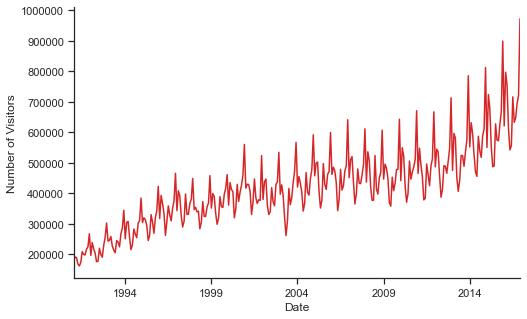

In [3]:
## from matplotlib.pyplot import figure
from matplotlib import style
fig, ax= plt.subplots(figsize=(8,5))
y=data['NumberofVisitors']
y.plot(color=red)
plt.xlabel('Date')
plt.ylabel('Number of Visitors')

ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

In [4]:
data.describe().round(2)

,NumberofVisitors
count,312.00
mean,419407.37
std,132443.06
min,161400.00
25%,332625.00
50%,412950.00
75%,488775.00
max,971800.00


Seasonal Random Walk Model (SRW)

A random walk model lagged back 12 months to reflect the holiday seasons

In [5]:
pred1 = []
for i in range(y.index.get_loc('1992-01'), len(y)):    
    pred1.append(y.iloc[i-12])
fittedSRW = pd.Series(pred1, index = y.loc['1992-01':,].index)

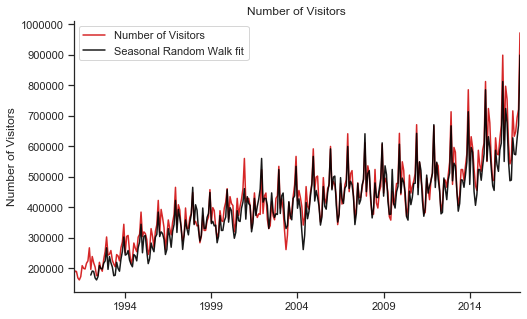

In [6]:
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=red, label='Number of Visitors')
fittedSRW.plot(color='black', label='Seasonal Random Walk fit', alpha=0.9)
ax.set_xlabel('')
ax.set_ylabel('Number of Visitors')
ax.set_title('Number of Visitors')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

Holt-Winters exponential smoothing

THE AIC suggests a multiplicative Holt-winter exponential smoothing without damping.

In [10]:
ahw=forecast.holtwinters(y, additive=True, damped=False, m=12)
ahw.fit()
ahw.summary()

 Additive Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.259 (0.040)
 beta  (trend)    0.024 (0.019)
 delta (seasonal) 0.582 (0.064)
 
 In-sample fit:
 MSE               475476792.239
 RMSE              21805.430
 Log-likelihood   -3559.562
 AIC               7127.124
 BIC               7142.096


In [11]:
mhw=forecast.holtwinters(y, additive=False, damped=False, m=12)
mhw.fit()
mhw.summary()

 Multiplicative Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.310 (0.078)
 beta  (trend)    0.012 (0.008)
 delta (seasonal) 0.362 (0.050)
 
 In-sample fit:
 MSE               434674481.526
 RMSE              20848.848
 Log-likelihood   -3545.566
 AIC               7099.131
 BIC               7114.103


In [12]:
mhw_damped=forecast.holtwinters(y, additive=False, damped=True, m=12)
mhw_damped.fit()
mhw_damped.summary()

 Multiplicative Holt-winters exponential smoothing (damped trend)

 Smoothing parameters:
 alpha (level)    0.482 (0.077)
 beta  (trend)    0.000 (0.029)
 delta (seasonal) 0.412 (0.086)
 phi (damping)    0.792 (0.054)
 
 In-sample fit:
 MSE               445818495.538
 RMSE              21114.414
 Log-likelihood   -3549.515
 AIC               7109.029
 BIC               7127.744


In [13]:
ahw_log=forecast.holtwinters(np.log(y), additive=True, damped=False, m=12)
ahw_log.fit()
ahw_log.summary()

 Additive Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.300 (0.052)
 beta  (trend)    0.009 (0.007)
 delta (seasonal) 0.426 (0.074)
 
 In-sample fit:
 MSE               0.003
 RMSE              0.054
 Log-likelihood    465.889
 AIC               -923.778
 BIC               -908.806


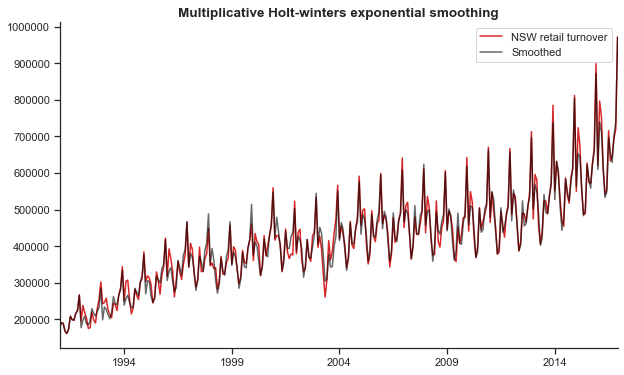

In [14]:
smoothed=pd.Series(mhw.smooth(), index=y.index)

fig, ax= plt.subplots(figsize=(10,6))

y.plot(color='#D62728', label='NSW retail turnover')
smoothed.plot(color='black', label='Smoothed', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Multiplicative Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

Model Diagnostics


Seasonal Random Walk

The Model sseems to adequately capture the time series pattern in the data, leading to small and insignificant residual correlations. The residuals do not follow the normal distribution, so that ideally we should use alternative assumptions for computing prediction intervals.

In [637]:
resid=y.loc['1992-01':,]-fittedSRW

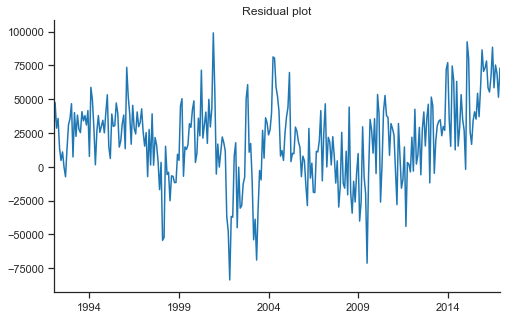

In [638]:
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

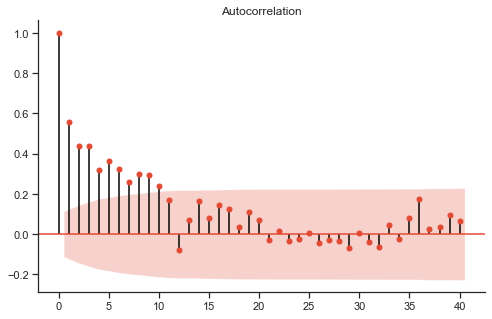

In [639]:
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

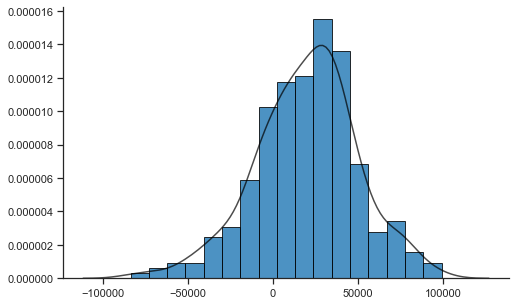

In [640]:
def hist(series):
    fig, ax= plt.subplots(figsize=(8,5))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

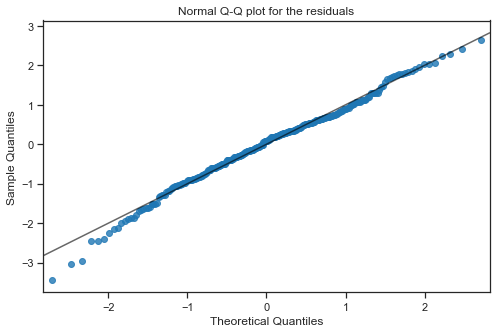

In [641]:
from forecast import histogram, qq_plot
qq_plot(resid)
plt.show()

Model Diagnostics 

Holts-Winter model

The Model sseems to adequately capture the time series pattern in the data, leading to small and insignificant residual correlations. The residuals somewhat do follow the normal distribution

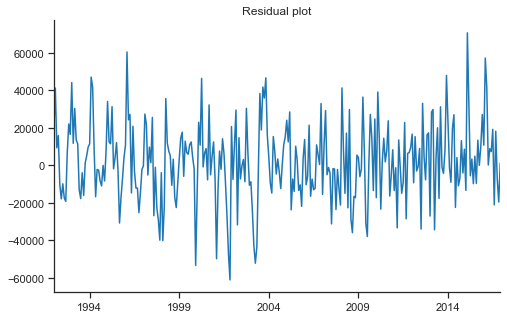

In [645]:
resid = (y-mhw.smooth())[12:] # we remove the first 12 observations as they are for initialisitation only
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()


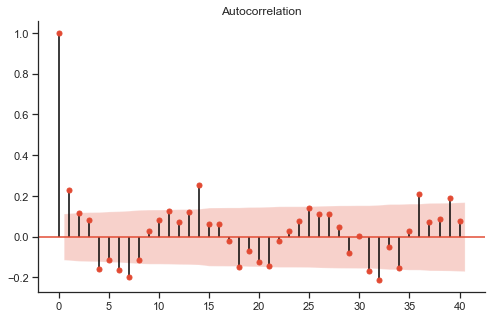

In [646]:
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

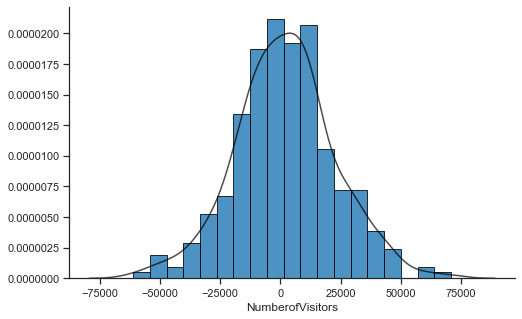

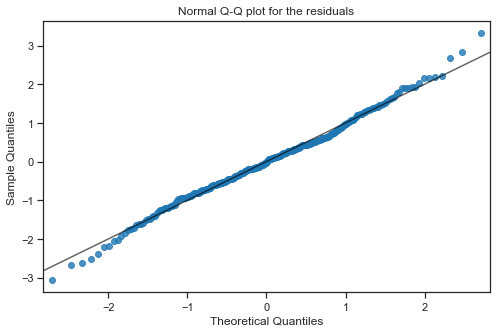

In [647]:
from forecast import histogram, qq_plot

histogram(resid)
plt.show()

qq_plot(resid)
plt.show()

Model Validation

In [652]:
validation=y['2006-12':].index # the validation period is December 2006 to December 2016
start = y.index.get_loc('2006-12') # numerical index corresponding to 2006 December

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = forecast.holtwinters(y.iloc[:i], additive=False, damped=False, m=12)
    model.fit()
    pred2.append(model.forecast(1)[0]) # multiplicate holt winters forecast

columns=['Seasonal RW', 'Multiplicative','Actual']
results = np.vstack([pred1,pred2,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

In [653]:
from statlearning import rmse_jack

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0], table.iloc[i,1] = rmse_jack(results.iloc[:,i], results.iloc[:,-1])
table.round(2)

,RMSE,SE
Seasonal RW,39550.52,2237.50
Multiplicative,23037.82,1984.58


In [654]:
data.index

PeriodIndex(['1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
             '1991-07', '1991-08', '1991-09', '1991-10',
             ...
             '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
             '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', name='Date', length=312, freq='M')

24 Month Forecast for both Models

Multiplicative HW

In [707]:
h=24

test=pd.period_range(start=y.index[-1]+1, periods=h, freq='M')

pred=pd.Series(mhw.forecast(h), index=test)

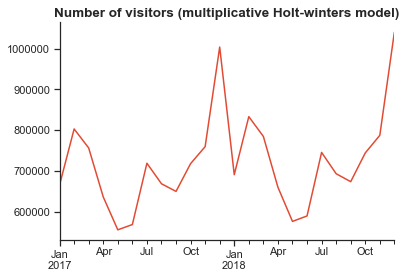

In [708]:
pred.plot()
ax.set_xlabel('')
ax.set_xticks([], minor=True)

plt.title('Number of visitors (multiplicative Holt-winters model)', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

Seasonal RW

In [16]:
pred1 = []
for i in range(311, 323):  
    pred1.append(y.iloc[i-12]) # random walk forecast

In [17]:
for i in range(311, 323):  
    pred1.append(y.iloc[i-12]) # random walk forecast

In [18]:
pred1

[898700,
 620500,
 796800,
 754600,
 610800,
 542000,
 555800,
 716000,
 632600,
 647200,
 694300,
 720500,
 898700,
 620500,
 796800,
 754600,
 610800,
 542000,
 555800,
 716000,
 632600,
 647200,
 694300,
 720500]

Text(0.5, 1.0, 'Number of visitors (Seasonal Random Walk)')

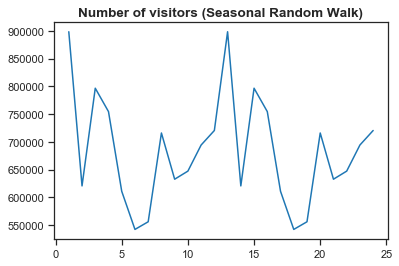

In [19]:
plt.plot(np.asarray([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]),pred1)
plt.title('Number of visitors (Seasonal Random Walk)', fontsize=13.5, fontweight='bold')
